In [28]:
import pickle
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, f1_score, recall_score
import copy

In [29]:
obsGLI = None
with open('obsgli.json') as f:
    obsGLI = json.load(f)

obsGold = None
with open('obs.json') as f:
    obsGold = json.load(f)

obsGoldV2 = None
with open('obsgoldv2.json') as f:
    obsGoldV2 = json.load(f)

resGLI = None
with open('resgli.json') as f:
    resGLI = json.load(f)

resGold = None
with open('res.json') as f:
    resGold = json.load(f)

resGoldV2 = None
with open('resgoldv2.json') as f:
    resGoldV2 = json.load(f)

In [30]:
modelObsGLI = pickle.load(open('modelObsGLI.pkl', 'rb'))
modelObsGLIClassification = pickle.load(open('modelObsClassificationGLI.pkl', 'rb'))
modelResGLI = pickle.load(open('modelResGLI.pkl', 'rb'))
modelObsGold = pickle.load(open('modelObsGold.pkl', 'rb'))
modelResGold = pickle.load(open('modelResGold.pkl', 'rb'))
modelObsGoldV2 = pickle.load(open('modelObsGoldV2.pkl', 'rb'))
modelObsGoldV2Classification = pickle.load(open('modelObsClassificationGold.pkl', 'rb'))
modelResGoldV2 = pickle.load(open('modelResGoldV2.pkl', 'rb'))

In [31]:
def plot_confusion_matrix(matrix, title='Confusion Matrix'):
    # Normalize by dividing each row by its sum to get percentages per class
    matrix_percentage = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    matrix_percentage = np.nan_to_num(matrix_percentage) # Replace NaN with 0
    
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix_percentage, cmap='Blues')
    plt.title(title)
    plt.colorbar(label='Percentage')
    
    # Add percentage annotations
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, f'{matrix_percentage[i, j]:.1%}\n({matrix[i, j]})',
                    ha='center', va='center')
    
    plt.xticks(np.arange(matrix.shape[1]), labels=np.arange(matrix.shape[1]))
    plt.yticks(np.arange(matrix.shape[0]), labels=np.arange(matrix.shape[0]))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    return plt.gcf()

## Datasets

### Class distributions

#### Obstruction

GLI

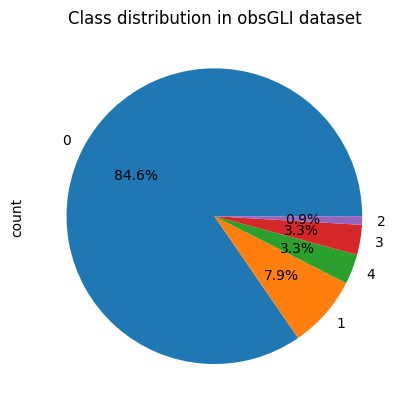

In [32]:
obsGLI_df = pd.DataFrame(obsGLI)

obsGLI_df['Obstruction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in obsGLI dataset')
plt.show()

GOLD

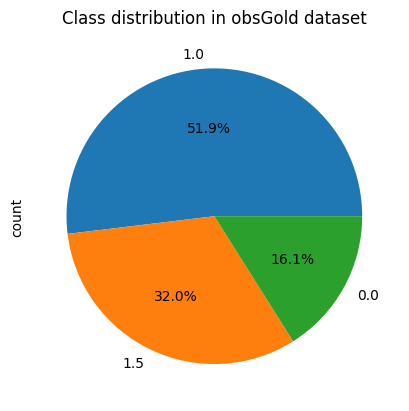

In [33]:
obsGold_df = pd.DataFrame.from_dict(obsGold, orient='index')

obsGold_df['Obstruction'] = obsGold_df.apply(lambda row: row['obstruction'], axis=1)
obsGold_df = obsGold_df.drop(columns=['obstruction'])

obsGold_df['Obstruction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in obsGold dataset')
plt.show()

GOLD V2

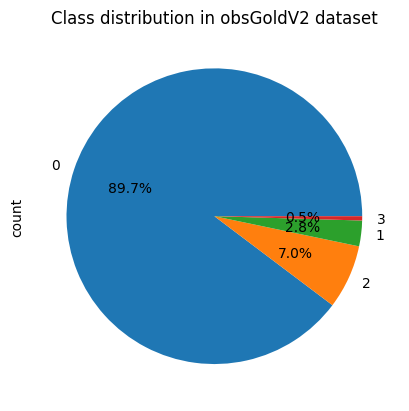

In [34]:
obsGoldV2_df = pd.DataFrame(obsGoldV2)

obsGoldV2_df['Obstruction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in obsGoldV2 dataset')
plt.show()

#### Restriction

GLI

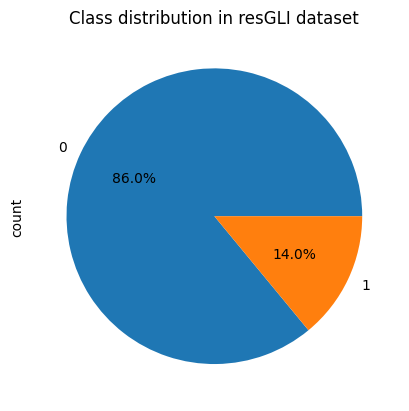

In [35]:
resGLI_df = pd.DataFrame(resGLI)

resGLI_df['Restriction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in resGLI dataset')
plt.show()

GOLD

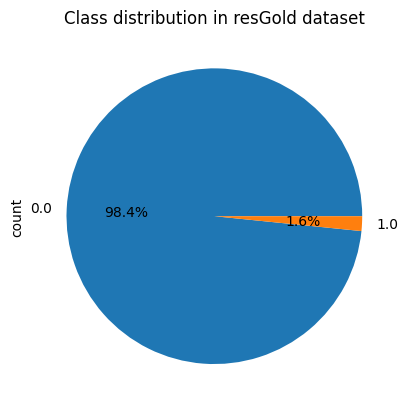

In [36]:
resGold_df = pd.DataFrame.from_dict(resGold, orient='index')

resGold_df['Restriction'] = resGold_df.apply(lambda row: row['restriction'], axis=1)
resGold_df = resGold_df.drop(columns=['restriction'])

resGold_df['Restriction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in resGold dataset')
plt.show()

GOLD V2

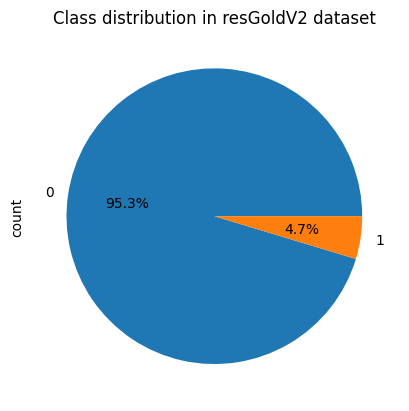

In [37]:
resGoldV2_df = pd.DataFrame(resGoldV2)

resGoldV2_df['Restriction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution in resGoldV2 dataset')
plt.show()

## Obstruction

### GLI

##### Normal

In [38]:
obsGLICopy = copy.deepcopy(obsGLI)

xObs = []
yObs = []
for item in obsGLICopy:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=42)

In [39]:
print(yObsVal, "\n", [round(4*x) for x in modelObsGLI.predict(pd.DataFrame(xObsVal)).flatten().tolist()])
print("MAE score for val:", mean_absolute_error(yObsVal, modelObsGLI.predict(pd.DataFrame(xObsVal))))
print(yObsTrain, "\n", [round(4*x) for x in modelObsGLI.predict(pd.DataFrame(xObsTrain)).flatten().tolist()])
print("MAE score for train:", mean_absolute_error(yObsTrain, modelObsGLI.predict(pd.DataFrame(xObsTrain))))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0] 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE score for val: 0.3384615384615385
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
[0, 0, 0, 0, 0, 4, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 
 [0

##### Classification

In [40]:
def n_acurracy(m, dX, dY, n=1):
    l = m.predict(pd.DataFrame(dX)).tolist()
    s = 0

    for p in l:
        for i in range(len(p)):
            p[i] = (p[i], i)
        p.sort(reverse=True)

    #print(l)

    for i in range(n):
        for j in range(len(dX)):
            if dY[j] == l[j][i][1]:
                s += 1

    return s / len(dX)

def n_f1_score(model, X, y, n=1):
    # Get predictions (these are already probabilities if using softmax)
    y_prob = model.predict(pd.DataFrame(X))
    
    # Get top n predictions for each sample
    top_n_preds = []
    for prob in y_prob:
        # Get indices of top n highest probabilities
        top_n_indices = np.argsort(prob)[-n:][::-1]
        top_n_preds.append(top_n_indices)
    
    y_pred = []
    for i, preds in enumerate(top_n_preds):
        y_pred.append(y[i] if y[i] in preds else preds[0])
    
    return f1_score(y, y_pred, average='macro')

In [41]:
obsGLICopy2 = copy.deepcopy(obsGLI)

xObs = []
yObs = []
for item in obsGLICopy2:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=42)

In [42]:
print("Train:")
print("Train accuracy with top 1:", n_acurracy(modelObsGLIClassification, xObsTrain, yObsTrain))
print("Train accuracy with top 2", n_acurracy(modelObsGLIClassification, xObsTrain, yObsTrain, 2))
print("Train f1 score with top 1", n_f1_score(modelObsGLIClassification, xObsTrain, yObsTrain))
print("Train f1 score with top 2", n_f1_score(modelObsGLIClassification, xObsTrain, yObsTrain, 2))

print("Val:")
print("Val accuracy with top 1:", n_acurracy(modelObsGLIClassification, xObsVal, yObsVal))
print("Val accuracy with top 2", n_acurracy(modelObsGLIClassification, xObsVal, yObsVal, 2))
print("Val f1 score with top 1", n_f1_score(modelObsGLIClassification, xObsVal, yObsVal))
print("Val f1 score with top 2", n_f1_score(modelObsGLIClassification, xObsVal, yObsVal, 2))

Train:
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Train accuracy with top 1: 0.8456375838926175
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
Train accuracy with top 2 0.9731543624161074
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
Train f1 score with top 1 0.18327272727272728
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train f1 score with top 2 0.7302083333333333
Val:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Val accuracy with top 1: 0.8461538461538461
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Val accuracy with top 2 0.9692307692307692
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Val f1 score with top 1 0.22916666666666666
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
Val f1 score with top 2 0.862202380952381


### Gold

In [43]:
obsGoldCopy = copy.deepcopy(obsGold)

xObs = []
yObs = []
for item in obsGoldCopy:
    yObs.append(obsGoldCopy[item]['obstruction'])
    del obsGoldCopy[item]['obstruction']
    xObs.append(list(obsGoldCopy[item].values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=43)

In [44]:
print(yObsVal, "\n", [round(4*x) for x in modelObsGold.predict(pd.DataFrame(xObsVal)).flatten().tolist()])
print("MAE score val:", mean_absolute_error(yObsVal, modelObsGold.predict(pd.DataFrame(xObsVal))))
print(yObsTrain, "\n", [round(4*x) for x in modelObsGold.predict(pd.DataFrame(xObsTrain)).flatten().tolist()])
print("MAE score train:", mean_absolute_error(yObsTrain, modelObsGold.predict(pd.DataFrame(xObsTrain))))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0, 1.5, 1, 1.5, 0, 1, 1, 1, 0, 1, 1, 1, 1.5, 1, 1.5, 1, 1, 1.5, 1, 0, 1.5, 1.5, 1.5, 1, 1, 1, 1.5, 1, 1, 1, 1.5, 1, 1, 1, 1, 1.5, 1, 1, 0, 1.5, 1, 1, 1.5, 1.5, 1, 0, 1.5, 1.5, 1, 0, 1.5, 1, 1.5, 0, 1.5, 1.5, 1, 1.5, 1, 1.5, 1, 1.5, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1.5, 0, 1, 1.5, 1, 1.5, 1.5, 1.5, 1.5, 0, 1, 1, 1, 1, 0, 1.5, 1.5, 1, 1.5, 1, 1, 0, 1, 1, 1, 1.5, 1, 1, 1.5, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1.5, 0, 0, 1.5, 1, 0, 1, 1.5, 0, 1.5, 1.5, 0, 1.5, 0, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1.5, 1, 0, 1, 1, 1, 1.5, 1.5, 1, 1.5, 1, 1, 0, 1.5, 1, 1, 1.5, 1.5, 1.5, 1.5, 1.5, 1, 1, 1, 1.5, 1.5, 1, 1, 0, 1, 1.5, 1.5, 0, 1, 1, 1, 1, 1, 1.5, 1, 1.5, 0, 1.5, 1, 1.5, 1, 1, 1.5, 1, 1, 1.5, 0, 1, 1.5, 1, 1, 1.5, 1.5, 1.5, 1, 1, 1.5, 1.5, 1, 1, 1, 0, 1, 1.5, 1, 1.5, 1, 1.5, 1.5, 1, 1, 1, 1.5, 1, 1.5, 1, 1.5, 1, 1, 1.5, 1, 1, 1.5, 1, 1.5, 0, 1, 1, 1.5, 1.5, 1.5, 1, 0, 1, 1, 1, 1.5, 1, 0, 1, 1, 1.5, 1.5, 0, 0, 1.5, 

### Gold V2

##### Normal

In [45]:
obsGoldV2Copy = copy.deepcopy(obsGoldV2)

xObs = []
yObs = []
for item in obsGoldV2Copy:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=42)

In [46]:
print(yObsVal, "\n", [round(4*x) for x in modelObsGoldV2.predict(pd.DataFrame(xObsVal)).flatten().tolist()])
print("MAE score for val:", mean_absolute_error(yObsVal, modelObsGoldV2.predict(pd.DataFrame(xObsVal))))
print(yObsTrain, "\n", [round(4*x) for x in modelObsGoldV2.predict(pd.DataFrame(xObsTrain)).flatten().tolist()])
print("MAE score for train:", mean_absolute_error(yObsTrain, modelObsGoldV2.predict(pd.DataFrame(xObsTrain))))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0] 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE score for val: 0.16923076923077662
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[0, 0, 0, 0, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
 [0,

##### Classification

In [47]:
obsGoldV2Copy2 = copy.deepcopy(obsGoldV2)

xObs = []
yObs = []
for item in obsGoldV2Copy2:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=42)

In [48]:
print("Train:")
print("Train accuracy with top 1:", n_acurracy(modelObsGoldV2Classification, xObsTrain, yObsTrain))
print("Train accuracy with top 2", n_acurracy(modelObsGoldV2Classification, xObsTrain, yObsTrain, 2))
print("Train f1 score with top 1", n_f1_score(modelObsGoldV2Classification, xObsTrain, yObsTrain))
print("Train f1 score with top 2", n_f1_score(modelObsGoldV2Classification, xObsTrain, yObsTrain, 2))

print("Val:")
print("Val accuracy with top 1:", n_acurracy(modelObsGoldV2Classification, xObsVal, yObsVal))
print("Val accuracy with top 2", n_acurracy(modelObsGoldV2Classification, xObsVal, yObsVal, 2))
print("Val f1 score with top 1", n_f1_score(modelObsGoldV2Classification, xObsVal, yObsVal))
print("Val f1 score with top 2", n_f1_score(modelObsGoldV2Classification, xObsVal, yObsVal, 2))

Train:
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Train accuracy with top 1: 0.8993288590604027
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train accuracy with top 2 0.959731543624161
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train f1 score with top 1 0.23674911660777387
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train f1 score with top 2 0.9007755474452555
Val:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Val accuracy with top 1: 0.8923076923076924
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Val accuracy with top 2 0.9692307692307692
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Val f1 score with top 1 0.31436314363143636
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Val f1 score with top 2 0.8832391713747646


## Restriction

### GLI

In [49]:
resGLICopy = copy.deepcopy(resGLI)

xObs = []
yObs = []
for item in resGLICopy:
    yObs.append(item['Restriction'])
    del item['Restriction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=42)

Val accuracy 0.9692307692307692
Val f1 score: 0.935515873015873
Val recall: 0.9


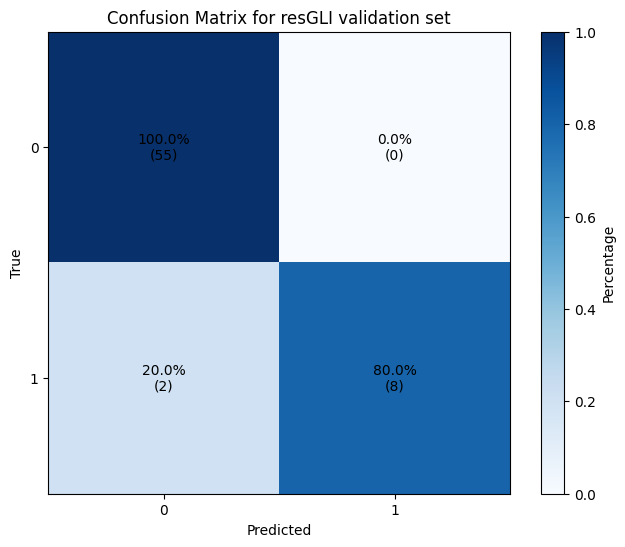

Train accuracy 0.9261744966442953
Train f1 score: 0.8610663728066457
Train recall: 0.9151162790697674


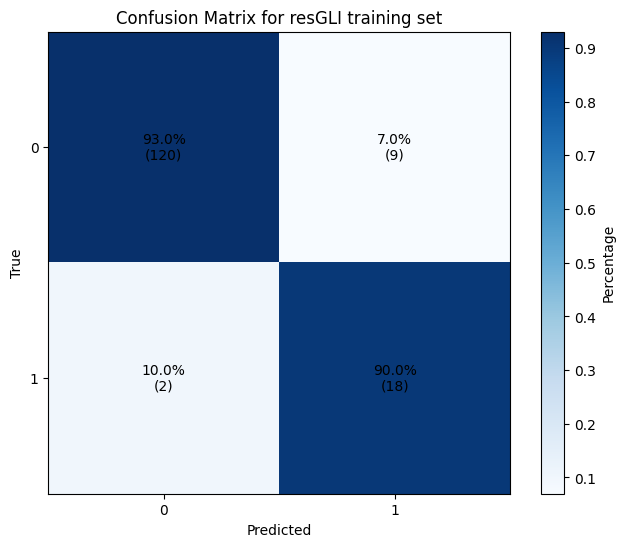

In [50]:
print("Val accuracy", accuracy_score(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal))))
print("Val f1 score:", f1_score(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal)), average='macro'))
print("Val recall:", recall_score(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal)), average='macro'))
matrix_val = confusion_matrix(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal)))

plot_confusion_matrix(matrix_val, title='Confusion Matrix for resGLI validation set')
plt.show()

print("Train accuracy", accuracy_score(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain))))
print("Train f1 score:", f1_score(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain)), average='macro'))
print("Train recall:", recall_score(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain)), average='macro'))
matrix_train = confusion_matrix(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain)))

plot_confusion_matrix(matrix_train, title='Confusion Matrix for resGLI training set')
plt.show()

### Gold

In [51]:
resGoldCopy = copy.deepcopy(resGold)

xObs = []
yObs = []
for item in resGoldCopy:
    yObs.append(resGoldCopy[item]['restriction'])
    del resGoldCopy[item]['restriction']
    xObs.append(list(resGoldCopy[item].values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=43)

Val accuracy 0.7251908396946565
Val f1 score: 0.45388574369531653
Val recall: 0.6963824289405685


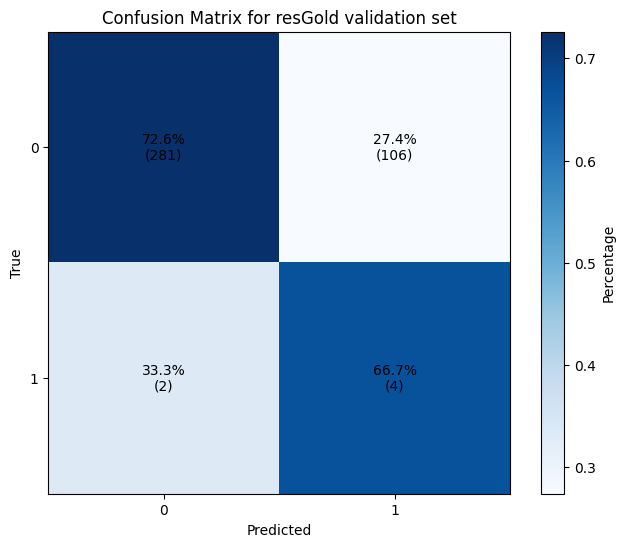

Train accuracy 0.7005464480874317
Train f1 score: 0.45084286890847597
Train recall: 0.7494444444444445


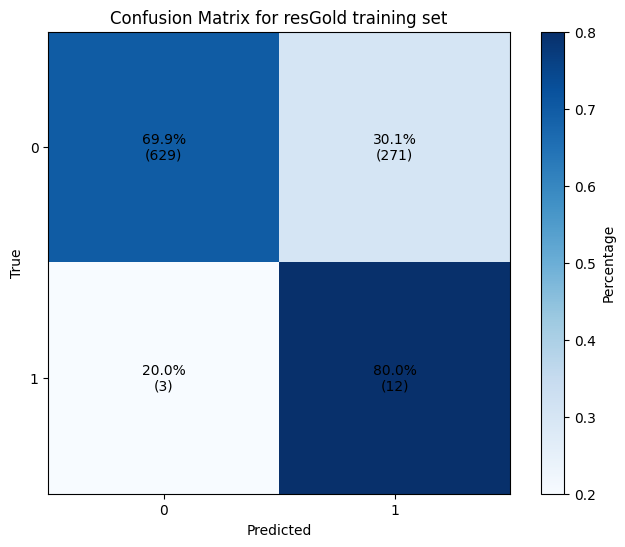

In [52]:
print("Val accuracy", accuracy_score(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal))))
print("Val f1 score:", f1_score(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal)), average='macro'))
print("Val recall:", recall_score(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal)), average='macro'))
matrix_val = confusion_matrix(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal)))

plot_confusion_matrix(matrix_val, title='Confusion Matrix for resGold validation set')
plt.show()

print("Train accuracy", accuracy_score(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain))))
print("Train f1 score:", f1_score(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain)), average='macro'))
print("Train recall:", recall_score(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain)), average='macro'))
matrix_train = confusion_matrix(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain)))

plot_confusion_matrix(matrix_train, title='Confusion Matrix for resGold training set')
plt.show()

### Gold V2

In [53]:
resGoldV2Copy = copy.deepcopy(resGoldV2)

xObs = []
yObs = []
for item in resGoldV2Copy:
    yObs.append(item['Restriction'])
    del item['Restriction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.3, random_state=42)

Val accuracy 0.9846153846153847
Val f1 score: 0.9403122130394859
Val recall: 0.9


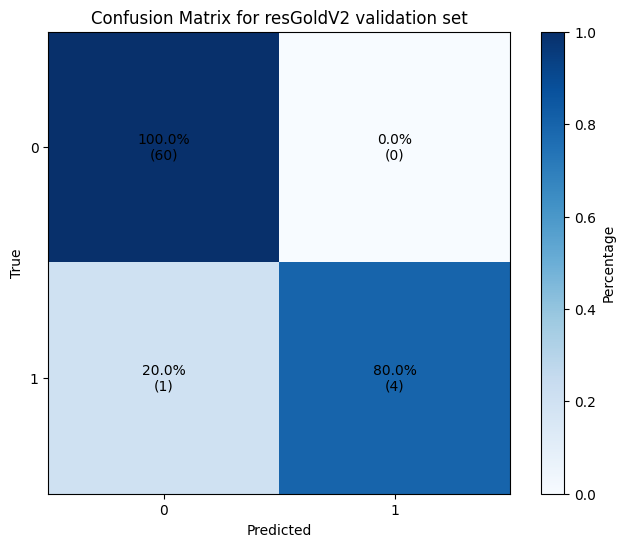

Train accuracy 0.9798657718120806
Train f1 score: 0.8793522267206478
Train recall: 0.9895833333333333


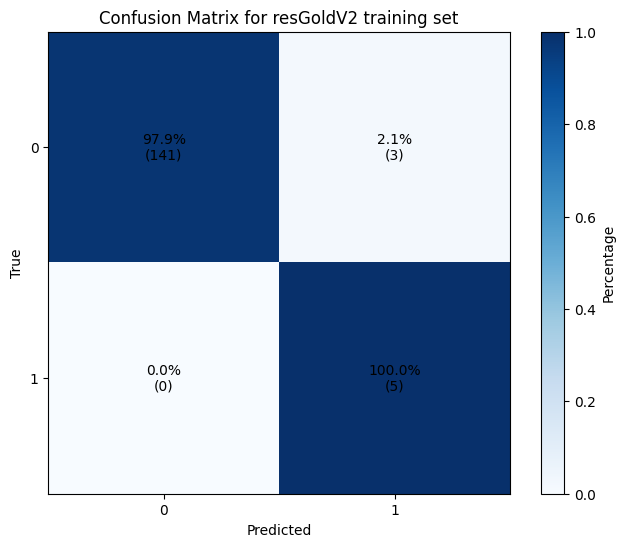

In [54]:
print("Val accuracy", accuracy_score(yObsVal, modelResGoldV2.predict(pd.DataFrame(xObsVal))))
print("Val f1 score:", f1_score(yObsVal, modelResGoldV2.predict(pd.DataFrame(xObsVal)), average='macro'))
print("Val recall:", recall_score(yObsVal, modelResGoldV2.predict(pd.DataFrame(xObsVal)), average='macro'))
matrix_val = confusion_matrix(yObsVal, modelResGoldV2.predict(pd.DataFrame(xObsVal)))

plot_confusion_matrix(matrix_val, title='Confusion Matrix for resGoldV2 validation set')
plt.show()

print("Train accuracy", accuracy_score(yObsTrain, modelResGoldV2.predict(pd.DataFrame(xObsTrain))))
print("Train f1 score:", f1_score(yObsTrain, modelResGoldV2.predict(pd.DataFrame(xObsTrain)), average='macro'))
print("Train recall:", recall_score(yObsTrain, modelResGoldV2.predict(pd.DataFrame(xObsTrain)), average='macro'))
matrix_train = confusion_matrix(yObsTrain, modelResGoldV2.predict(pd.DataFrame(xObsTrain)))

plot_confusion_matrix(matrix_train, title='Confusion Matrix for resGoldV2 training set')
plt.show()